In [57]:
import requests
import bs4
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
#import talib as ta
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [58]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36',
    "Accept-Language": "en-US,en;q=0.9",
    "Accept-Encoding": "gzip, deflate, br",
    "Referer": "https://finance.yahoo.com/",
    "Connection": "keep-alive",
    "Cookie":"DSS=ts=1686583039&cnt=0&sdts=1710847373&sdtp=mcafee; GUCS=AQxiZzhb; GUC=AQEBCAFnL01nYUIhggT4&s=AQAAAL2smIW1&g=Zy4Ifg; A1=d=AQABBP82h2QCEIhGQ2pwuu99s9Jktn7aNSgFEgEBCAFNL2dhZ1lQb2UB_eMBAAcI_zaHZH7aNSg&S=AQAAAvys-9pxYxO5RGb2lDmhV4s; A3=d=AQABBP82h2QCEIhGQ2pwuu99s9Jktn7aNSgFEgEBCAFNL2dhZ1lQb2UB_eMBAAcI_zaHZH7aNSg&S=AQAAAvys-9pxYxO5RGb2lDmhV4s; A1S=d=AQABBP82h2QCEIhGQ2pwuu99s9Jktn7aNSgFEgEBCAFNL2dhZ1lQb2UB_eMBAAcI_zaHZH7aNSg&S=AQAAAvys-9pxYxO5RGb2lDmhV4s; cmp=t=1731070074&j=0&u=1---; gpp=DBAA; gpp_sid=-1; axids=gam=y-Hn7XuU5E2uJAizJ0LnHFSC.shqu8qwjP~A&dv360=eS04M0lZUjhORTJ1R2NMMGhPWlFtX1VtM2JhUzg5MjZkN35B&ydsp=y-93Ikw4BE2uI.e6TLAMyLRMZjc1jEPvSO~A&tbla=y-mD1CE4xE2uLtivd28T7PcjkBvfeqHjAE~A; tbla_id=249a62cc-baa2-4b39-a04a-11f365404de5-tucte278df9; PRF=t%3DHAL.NS%252BAAPL; _cb=DXdBLw6ELwyB6YcLI; _chartbeat2=.1731070077290.1731071400913.1.s4MzCBz4FSl4k6Rj2kOIpfPVku.2; _cb_svref=null"
    # other headers as needed
}
r = requests.get("https://finance.yahoo.com/quote/HAL.NS/history/?period1=1699437563&period2=1731059815",headers=headers)
print(r)
print(r.content)

<Response [200]>
b'<!doctype html>\n<html lang="en-US" theme="light"  data-color-scheme="light" class="desktop neo-green dock-upscale">\n    <head>\n        <meta charset="utf-8" />\n        <meta name="oath:guce:consent-host" content="guce.yahoo.com" />\n        <link rel="preconnect" href="//s.yimg.com" crossorigin="anonymous"><link rel="preconnect" href="//geo.yahoo.com"/><link rel="preconnect" href="//query1.finance.yahoo.com"/><link rel="preconnect" href="//query2.finance.yahoo.com"/><link rel="preconnect" href="//consent.cmp.oath.com"/><link rel="preload" href="/__rapidworker-1.2.js" as="worker"/><link rel="preconnect" href="https://s.yimg.com/uc/finance/webcore/js/_staticFinProtobuf.4b1559b8e4645fd93a12.js"/><link rel="preconnect" href="https://cdn.jsdelivr.net/npm/protobufjs@7.1.2/dist/minimal/protobuf.min.js"/><script>window.finNeoPageStart = Date.now();</script><script>(function(){if(!window.YAHOO){window.YAHOO={}}; window.YAHOO.context={"consent":{"allowContentPersonalizatio

In [59]:
soup = bs4.BeautifulSoup(r.content,'lxml')

In [60]:
soup

<!DOCTYPE html>
<html class="desktop neo-green dock-upscale" data-color-scheme="light" lang="en-US" theme="light">
<head>
<meta charset="utf-8"/>
<meta content="guce.yahoo.com" name="oath:guce:consent-host"/>
<link crossorigin="anonymous" href="//s.yimg.com" rel="preconnect"/><link href="//geo.yahoo.com" rel="preconnect"/><link href="//query1.finance.yahoo.com" rel="preconnect"/><link href="//query2.finance.yahoo.com" rel="preconnect"/><link href="//consent.cmp.oath.com" rel="preconnect"/><link as="worker" href="/__rapidworker-1.2.js" rel="preload"/><link href="https://s.yimg.com/uc/finance/webcore/js/_staticFinProtobuf.4b1559b8e4645fd93a12.js" rel="preconnect"/><link href="https://cdn.jsdelivr.net/npm/protobufjs@7.1.2/dist/minimal/protobuf.min.js" rel="preconnect"/><script>window.finNeoPageStart = Date.now();</script><script>(function(){if(!window.YAHOO){window.YAHOO={}}; window.YAHOO.context={"consent":{"allowContentPersonalization":true,"allowCrossDeviceMapping":true,"allowFirstPart

In [61]:
all_info = soup.find_all('tr',class_ = 'yf-j5d1ld')

In [62]:
info_heading=all_info[0]
info_heading

<tr class="yf-j5d1ld"><th class="yf-j5d1ld">Date  </th><th class="yf-j5d1ld">Open  </th><th class="yf-j5d1ld">High  </th><th class="yf-j5d1ld">Low  </th><th class="yf-j5d1ld">Close   <span class="container yf-7dju6j"><div class="icon fin-icon primary-icn sz-medium tw-align-text-top yf-1pnxr15"><!-- HTML_TAG_START --><svg viewbox="0 0 24 24" xmlns="http://www.w3.org/2000/svg"><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2m0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8"></path></svg><!-- HTML_TAG_END --></div> <div class="tooltip al-bottom yf-7dju6j" role="tooltip"><div class="arrow yf-7dju6j"></div> <h3 class="title yf-7dju6j"></h3> <span class="toolTipContent yf-j5d1ld" slot="content">Close price adjusted for splits. </span></div> </span> </th><th class="yf-j5d1ld">Adj Close   <span class="container yf-7dju6j"><div class="icon fin-icon primary-icn sz-medium tw-align-text-top yf-1pnxr15"><!-- HTML_TAG_START --><svg viewbox="0

In [63]:
data=all_info[1:]

In [64]:
row_data=data[1].find_all('td' , class_='yf-j5d1ld')

In [65]:
row_data

[<td class="yf-j5d1ld">Nov 7, 2024</td>,
 <td class="yf-j5d1ld">4,404.00</td>,
 <td class="yf-j5d1ld">4,454.00</td>,
 <td class="yf-j5d1ld">4,381.10</td>,
 <td class="yf-j5d1ld">4,433.80</td>,
 <td class="yf-j5d1ld">4,433.80</td>,
 <td class="yf-j5d1ld">1,185,134</td>]

In [66]:
# Initialize arrays to store all data
dates = []
open_prices = []
high_prices = []
low_prices = []
close_prices = []
adj_close_prices = []
volumes = []

# Loop through each row in data
for row in data:
    row_data = row.find_all('td', class_='yf-j5d1ld')
    
    # Ensure the row has the expected number of columns
    if len(row_data) >= 7:
        # Convert date to the format dd/mm/yyyy and append to dates array
        date = datetime.strptime(row_data[0].text.strip(), '%b %d, %Y')
        dates.append(date.strftime('%m/%d/%Y'))
        
        # Extract and append other numerical data
        open_prices.append(float(row_data[1].text.replace(',', '').strip()))
        high_prices.append(float(row_data[2].text.replace(',', '').strip()))
        low_prices.append(float(row_data[3].text.replace(',', '').strip()))
        close_prices.append(float(row_data[4].text.replace(',', '').strip()))
        adj_close_prices.append(float(row_data[5].text.replace(',', '').strip()))
        volumes.append(int(row_data[6].text.replace(',', '').strip()))

# Print the arrays to verify the output
print("Dates:", dates)
print("Open Prices:", open_prices)
print("High Prices:", high_prices)
print("Low Prices:", low_prices)
print("Close Prices:", close_prices)
print("Adjusted Close Prices:", adj_close_prices)
print("Volumes:", volumes)


Dates: ['11/08/2024', '11/07/2024', '11/06/2024', '11/05/2024', '11/04/2024', '11/01/2024', '10/31/2024', '10/30/2024', '10/29/2024', '10/28/2024', '10/25/2024', '10/24/2024', '10/23/2024', '10/22/2024', '10/21/2024', '10/18/2024', '10/17/2024', '10/16/2024', '10/15/2024', '10/14/2024', '10/11/2024', '10/10/2024', '10/09/2024', '10/08/2024', '10/07/2024', '10/04/2024', '10/03/2024', '10/01/2024', '09/30/2024', '09/27/2024', '09/26/2024', '09/25/2024', '09/24/2024', '09/23/2024', '09/20/2024', '09/19/2024', '09/18/2024', '09/17/2024', '09/16/2024', '09/13/2024', '09/12/2024', '09/11/2024', '09/10/2024', '09/09/2024', '09/06/2024', '09/05/2024', '09/04/2024', '09/03/2024', '09/02/2024', '08/30/2024', '08/29/2024', '08/28/2024', '08/27/2024', '08/26/2024', '08/23/2024', '08/22/2024', '08/21/2024', '08/20/2024', '08/19/2024', '08/16/2024', '08/14/2024', '08/13/2024', '08/12/2024', '08/09/2024', '08/08/2024', '08/07/2024', '08/06/2024', '08/05/2024', '08/02/2024', '08/01/2024', '07/31/2024'

In [67]:
import csv

# Define the file name
csv_file = "stock_data.csv"

# Open the CSV file for writing
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write the header
    writer.writerow(["Date", "Open", "High", "Low", "Close", "Adjusted Close", "Volume"])
    
    # Write each row of data
    for i in range(len(dates)):
        writer.writerow([
            dates[i],
            open_prices[i],
            high_prices[i],
            low_prices[i],
            close_prices[i],
            adj_close_prices[i],
            volumes[i]
        ])

print(f"Data has been successfully saved to {csv_file}")


Data has been successfully saved to stock_data.csv


In [68]:
HAL=pd.read_csv('stock_data.csv')
HAL.describe()

Open         High          Low        Close  Adjusted Close  \
count   247.00000   247.000000   247.000000   247.000000      247.000000   
mean   3910.15749  3967.414980  3839.856883  3904.360324     3890.966437   
std     978.07588   988.528263   954.071222   967.053054      972.718769   
min    2026.95000  2048.000000  1995.000000  2030.800000     2010.480000   
25%    3016.50000  3045.400000  2980.000000  3003.800000     2981.270000   
50%    4035.35000  4086.250000  3966.350000  4074.700000     4063.520000   
75%    4740.00000  4781.050000  4666.400000  4712.450000     4707.190000   
max    5638.90000  5674.750000  5560.500000  5621.950000     5606.520000   

             Volume  
count  2.470000e+02  
mean   2.418579e+06  
std    1.977929e+06  
min    1.701530e+05  
25%    1.287220e+06  
50%    1.801363e+06  
75%    2.792774e+06  
max    1.548668e+07

In [69]:
HAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            247 non-null    object 
 1   Open            247 non-null    float64
 2   High            247 non-null    float64
 3   Low             247 non-null    float64
 4   Close           247 non-null    float64
 5   Adjusted Close  247 non-null    float64
 6   Volume          247 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.6+ KB


In [70]:
HAL=HAL.iloc[::-1]

In [71]:
HAL

Date     Open     High      Low    Close  Adjusted Close   Volume
246  11/08/2023  2026.95  2048.00  2008.75  2044.55         2024.09  1748876
245  11/09/2023  2045.00  2049.75  2026.00  2030.80         2010.48   679939
244  11/10/2023  2041.65  2110.95  1995.00  2058.90         2038.30  4755794
243  11/13/2023  2072.00  2075.00  2041.80  2060.35         2039.74  1183911
242  11/15/2023  2066.05  2105.00  2040.55  2091.00         2070.08  1634396
..          ...      ...      ...      ...      ...             ...      ...
4    11/04/2024  4287.95  4287.95  4196.00  4208.25         4208.25  1013884
3    11/05/2024  4200.00  4280.00  4130.00  4261.95         4261.95  1215686
2    11/06/2024  4276.00  4420.00  4270.05  4390.15         4390.15  1228872
1    11/07/2024  4404.00  4454.00  4381.10  4433.80         4433.80  1185134
0    11/08/2024  4435.55  4476.85  4380.00  4400.60         4400.60  1073330

[247 rows x 7 columns]

In [72]:
client = MongoClient("mongodb://localhost:27017/")  # Replace with your MongoDB connection string if different
db = client['stock_database']  # Database name
collection = db['stock_data']  # Collection name

# Convert DataFrame to dictionary format
data_dict = HAL.to_dict("records")

# Insert data into MongoDB
collection.insert_many(data_dict)

print("Data successfully saved to MongoDB!")

Data successfully saved to MongoDB!


In [73]:
for x in collection.find():
    print(x)

{'_id': ObjectId('67307b43e5ae7f1eb1466e81'), 'Date': '08/11/2024', 'Open': 4435.55, 'High': 4476.85, 'Low': 4380.0, 'Close': 4400.6, 'Adjusted Close': 4400.6, 'Volume': 1073061}
{'_id': ObjectId('67307b43e5ae7f1eb1466e82'), 'Date': '07/11/2024', 'Open': 4404.0, 'High': 4454.0, 'Low': 4381.1, 'Close': 4433.8, 'Adjusted Close': 4433.8, 'Volume': 1185134}
{'_id': ObjectId('67307b43e5ae7f1eb1466e83'), 'Date': '06/11/2024', 'Open': 4276.0, 'High': 4420.0, 'Low': 4270.05, 'Close': 4390.15, 'Adjusted Close': 4390.15, 'Volume': 1228872}
{'_id': ObjectId('67307b43e5ae7f1eb1466e84'), 'Date': '05/11/2024', 'Open': 4200.0, 'High': 4280.0, 'Low': 4130.0, 'Close': 4261.95, 'Adjusted Close': 4261.95, 'Volume': 1215686}
{'_id': ObjectId('67307b43e5ae7f1eb1466e85'), 'Date': '04/11/2024', 'Open': 4287.95, 'High': 4287.95, 'Low': 4196.0, 'Close': 4208.25, 'Adjusted Close': 4208.25, 'Volume': 1013884}
{'_id': ObjectId('67307b43e5ae7f1eb1466e86'), 'Date': '01/11/2024', 'Open': 4269.8, 'High': 4295.55, 'Lo

In [74]:
HAL.head()

Date     Open     High      Low    Close  Adjusted Close   Volume
246  11/08/2023  2026.95  2048.00  2008.75  2044.55         2024.09  1748876
245  11/09/2023  2045.00  2049.75  2026.00  2030.80         2010.48   679939
244  11/10/2023  2041.65  2110.95  1995.00  2058.90         2038.30  4755794
243  11/13/2023  2072.00  2075.00  2041.80  2060.35         2039.74  1183911
242  11/15/2023  2066.05  2105.00  2040.55  2091.00         2070.08  1634396

In [75]:
print(HAL.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adjusted Close', 'Volume'], dtype='object')


In [76]:
HAL['Date'] = pd.to_datetime(HAL['Date'])
#HAL.set_index('Date', inplace=True)
print(HAL.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adjusted Close', 'Volume'], dtype='object')


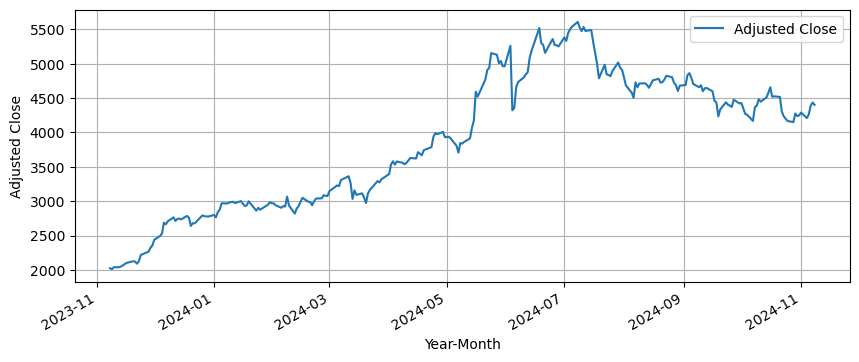

In [77]:
HAL.plot(x='Date',y='Adjusted Close',figsize=(10,4))
plt.grid()
plt.xlabel("Year-Month")
plt.ylabel("Adjusted Close");

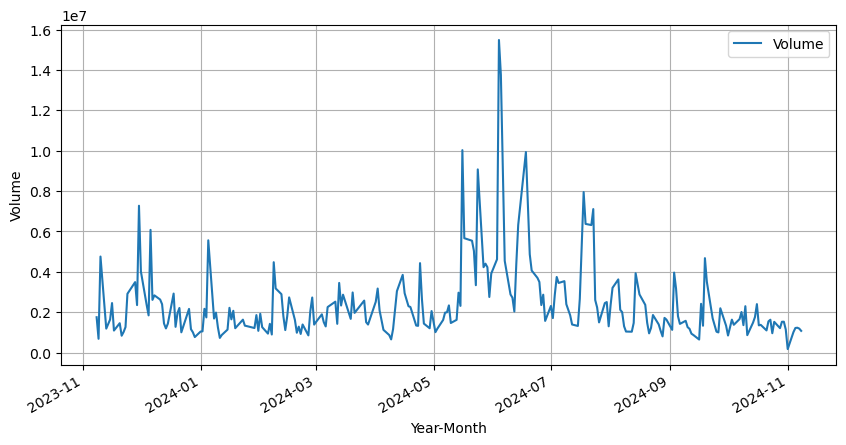

In [78]:
HAL.plot(x='Date',y='Volume',figsize=(10,5))
plt.grid()
plt.xlabel("Year-Month")
plt.ylabel("Volume");

In [79]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    HAL[column_name] = HAL['Adjusted Close'].rolling(window=ma).mean()

In [80]:
HAL.head(12)

Date     Open     High      Low    Close  Adjusted Close   Volume  \
246 2023-11-08  2026.95  2048.00  2008.75  2044.55         2024.09  1748876   
245 2023-11-09  2045.00  2049.75  2026.00  2030.80         2010.48   679939   
244 2023-11-10  2041.65  2110.95  1995.00  2058.90         2038.30  4755794   
243 2023-11-13  2072.00  2075.00  2041.80  2060.35         2039.74  1183911   
242 2023-11-15  2066.05  2105.00  2040.55  2091.00         2070.08  1634396   
241 2023-11-16  2092.85  2155.00  2085.00  2114.30         2093.15  2450457   
240 2023-11-17  2120.10  2148.90  2115.75  2126.00         2104.73  1087862   
239 2023-11-20  2137.30  2167.00  2116.00  2146.60         2125.12  1452454   
238 2023-11-21  2154.00  2161.95  2135.00  2144.30         2122.85   832725   
237 2023-11-22  2144.95  2152.10  2088.95  2112.10         2090.97  1014171   
236 2023-11-23  2116.95  2159.00  2107.65  2146.25         2124.78  1259937   
235 2023-11-24  2154.90  2251.00  2145.75  2240.30         2217.88  2909879   

     MA for 10 days  MA for 20 days  MA for 50 days  
246             NaN             NaN             NaN  
245             NaN             NaN             NaN  
244             NaN             NaN             NaN  
243             NaN             NaN             NaN  
242             NaN             NaN             NaN  
241             NaN             NaN             NaN  
240             NaN             NaN             NaN  
239             NaN             NaN             NaN  
238             NaN             NaN             NaN  
237        2071.951             NaN             NaN  
236        2082.020             NaN             NaN  
235        2102.760             NaN             NaN

## Simple Moving Averages

Moving averages is a "smooth" price data that is created in a single flowing line. Therefore, the line represents the average price over a period of time. Traders use the moving average to decides to determined the time frame in which he or she trades. On the other hand, investors use moving averages for long-term trend and they use the 200-day, 100-day and 50-day simple moving average.

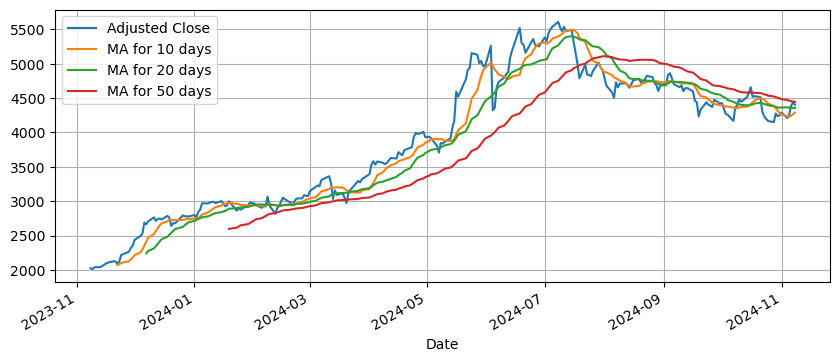

In [81]:
HAL.plot(x='Date',y=['Adjusted Close','MA for 10 days','MA for 20 days','MA for 50 days'],figsize=(10,4))
plt.grid()

## Daily Return

Daily return measures the percentage change in the stock's price from one day to the next. It reflects the day-to-day price fluctuations, providing insight into the stock's volatility. Traders and investors use daily returns to assess short-term performance and gauge market sentiment. By analyzing daily returns, they can better understand a stock's risk and identify potential entry or exit points based on daily price movements. Over time, tracking daily returns also helps in understanding a stock's overall trend and volatility characteristics.

In [82]:
HAL['Daily Return'] = HAL['Adjusted Close'].pct_change()

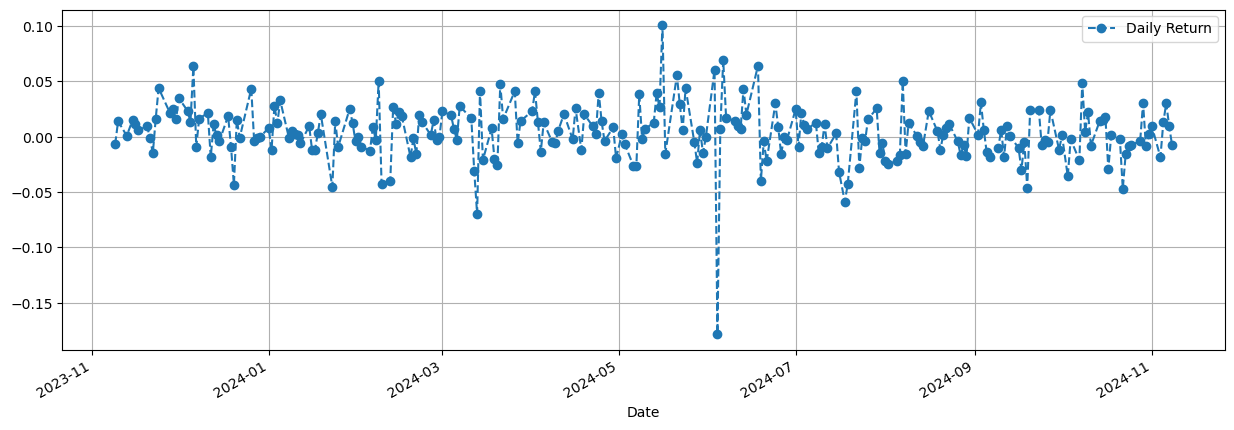

In [83]:
HAL.plot(x='Date',y='Daily Return',linestyle='--',marker='o',figsize=(15,5))
plt.grid()
plt.legend()

C:\Users\Vilas Relan\AppData\Local\Temp\ipykernel_29584\72771320.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(HAL['Daily Return'].dropna(),bins=100,color='purple');
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


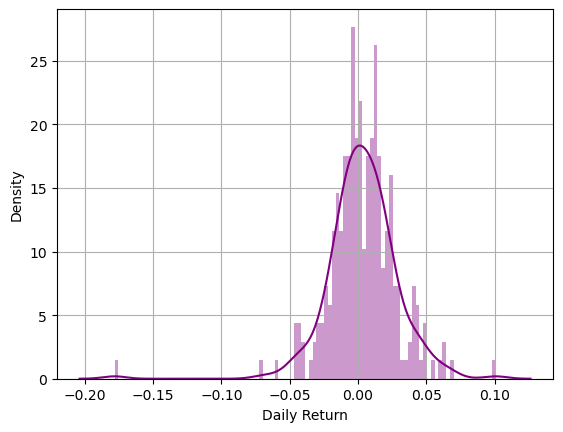

In [84]:
sns.distplot(HAL['Daily Return'].dropna(),bins=100,color='purple');
plt.grid()

In [85]:
#import pandas as pd

# Assuming 'df' is your DataFrame and it contains a column 'Adj Close'
def calculate_rsi(data, window=14):
    delta = data.diff()  # Calculate daily price change
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()  # Calculate average gain
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()  # Calculate average loss

    # Calculate Relative Strength (RS)
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))  # Calculate RSI
    return rsi

# Calculate RSI
HAL['RSI'] = calculate_rsi(HAL['Adjusted Close'], window=14)

# Drop any NaN values resulting from the rolling window
HAL['RSI'] = HAL['RSI'].dropna()

# Display the RSI values
print(HAL['RSI'])


246          NaN
245          NaN
244          NaN
243          NaN
242          NaN
         ...    
4      29.510575
3      27.307781
2      42.526328
1      44.932545
0      43.811491
Name: RSI, Length: 247, dtype: float64


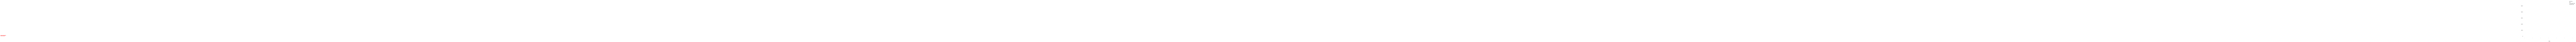

In [86]:
fig, ax = plt.subplots(figsize=(14, 10))

# Plot the 'Adj Close' price and RSI
plt.plot(HAL['Date'],HAL['Adjusted Close'], label='Adj Close')
plt.plot(HAL['Date'],HAL['RSI'], label='RSI')

ax.axhline(y=80, color='r', linestyle='--', label='Overbought (80)')
ax.axhline(y=20, color='r', linestyle='--', label='Oversold (20)')

# Add labels for overbought and oversold
plt.text(s='Overbought', x=HAL.index[0], y=80, fontsize=14, color='red')
plt.text(s='Oversold', x=HAL.index[0], y=20, fontsize=14, color='red')

# Add legend and labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price / RSI')

# Rotate x-axis labels for readability
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, fontsize=8)

# Show the plot
plt.show()

In [31]:
def ema(series, span):
    return series.ewm(span=span, adjust=False).mean()

# Calculate MACD, Signal Line, and MACD Histogram for HAL DataFrame
def calculate_macd(df):
    # Calculate the 12-day and 26-day EMAs on 'Adjusted Close'
    ema12 = ema(df['Adjusted Close'], span=12)
    ema26 = ema(df['Adjusted Close'], span=26)

    # Calculate MACD line
    macd = ema12 - ema26

    # Calculate Signal line (9-day EMA of MACD)
    macd_signal = ema(macd, span=9)

    # Calculate MACD Histogram
    macd_hist = macd - macd_signal

    return macd.dropna(), macd_signal.dropna(), macd_hist.dropna()

# Apply the function to HAL DataFrame
macd, macd_signal, macd_hist = calculate_macd(HAL)

macd, macd_signal, macd_hist

(246     0.000000
 245    -1.085698
 244     0.295316
 243     1.488813
 242     4.827208
          ...    
 4     -71.897851
 3     -68.085524
 2     -54.095973
 1     -39.036969
 0     -29.442172
 Name: Adjusted Close, Length: 247, dtype: float64,
 246     0.000000
 245    -0.217140
 244    -0.114649
 243     0.206044
 242     1.130277
          ...    
 4     -65.523735
 3     -66.036093
 2     -63.648069
 1     -58.725849
 0     -52.869113
 Name: Adjusted Close, Length: 247, dtype: float64,
 246     0.000000
 245    -0.868558
 244     0.409964
 243     1.282769
 242     3.696931
          ...    
 4      -6.374117
 3      -2.049431
 2       9.552096
 1      19.688879
 0      23.426941
 Name: Adjusted Close, Length: 247, dtype: float64)

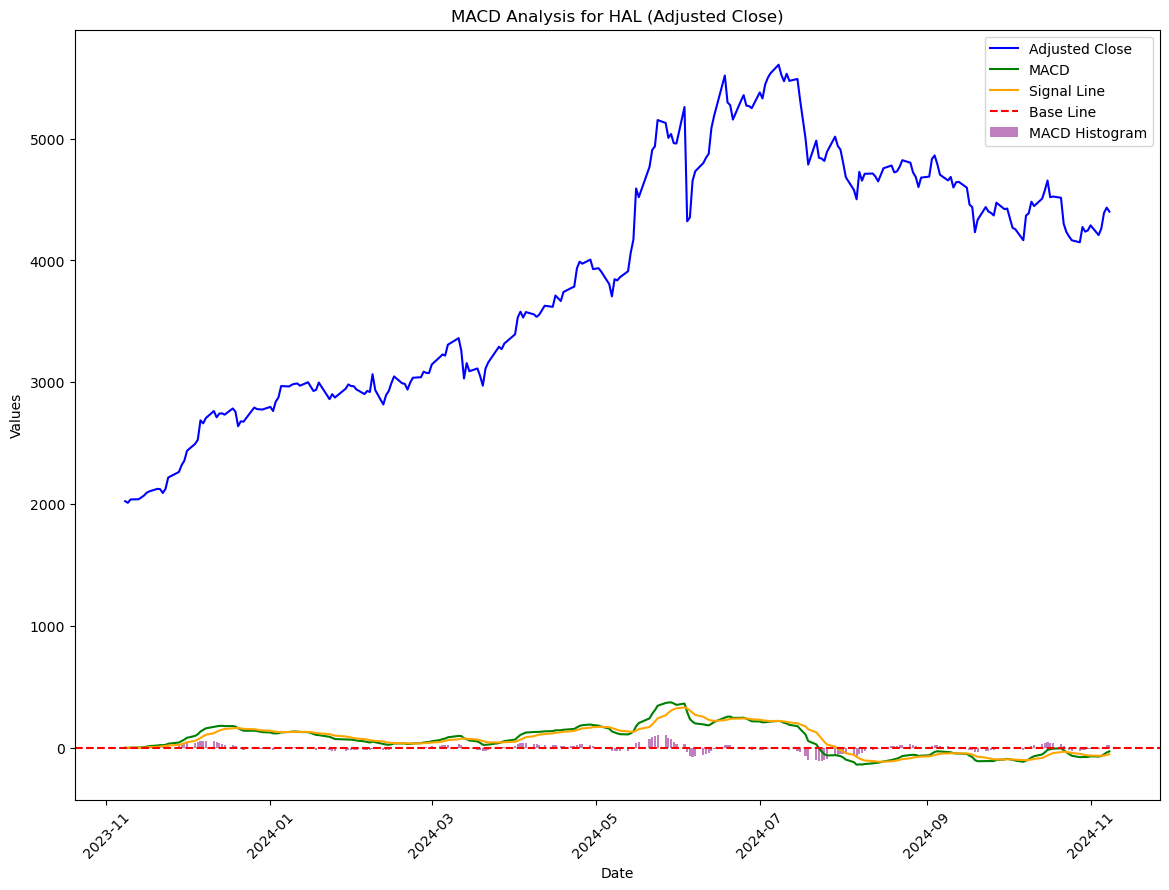

In [32]:
fig, ax = plt.subplots(figsize=(14, 10))

# Plot 'Adjusted Close' prices
plt.plot(HAL['Date'], HAL['Adjusted Close'], label='Adjusted Close', color='blue')

# Plot MACD line
plt.plot(HAL['Date'], macd, label='MACD', color='green')

# Plot Signal line
plt.plot(HAL['Date'], macd_signal, label='Signal Line', color='orange')

# Plot MACD Histogram as bars
plt.bar(HAL['Date'], macd_hist, label='MACD Histogram', color='purple', alpha=0.5)

# Add baseline at y=0
ax.axhline(y=0, color='red', linestyle='--', label='Base Line')

# Customize plot with labels and legend
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('MACD Analysis for HAL (Adjusted Close)')
plt.legend()
plt.xticks(rotation=45)  # Rotate dates for readability
plt.show()

In [36]:
def calculate_obv(df):
    obv = [0]  # Initialize OBV with the first value as 0
    for i in range(1, len(df)):
        if df['Adjusted Close'][i] > df['Adjusted Close'][i - 1]:
            obv.append(obv[-1] + df['Volume'][i])  # If price is up, add volume
        elif df['Adjusted Close'][i] < df['Adjusted Close'][i - 1]:
            obv.append(obv[-1] - df['Volume'][i])  # If price is down, subtract volume
        else:
            obv.append(obv[-1])  # If price is unchanged, keep OBV the same
    return pd.Series(obv, index=df.index)

# Assuming df has 'Adj Close' and 'Volume' columns
HAL['OBV'] = calculate_obv(HAL)

# Display the calculated OBV
print(HAL['OBV'])

246           0
245     1185134
244      -43738
243    -1259424
242    -2273308
         ...   
4     -57957407
3     -59141318
2     -63897112
1     -64577051
0     -62828175
Name: OBV, Length: 247, dtype: int64


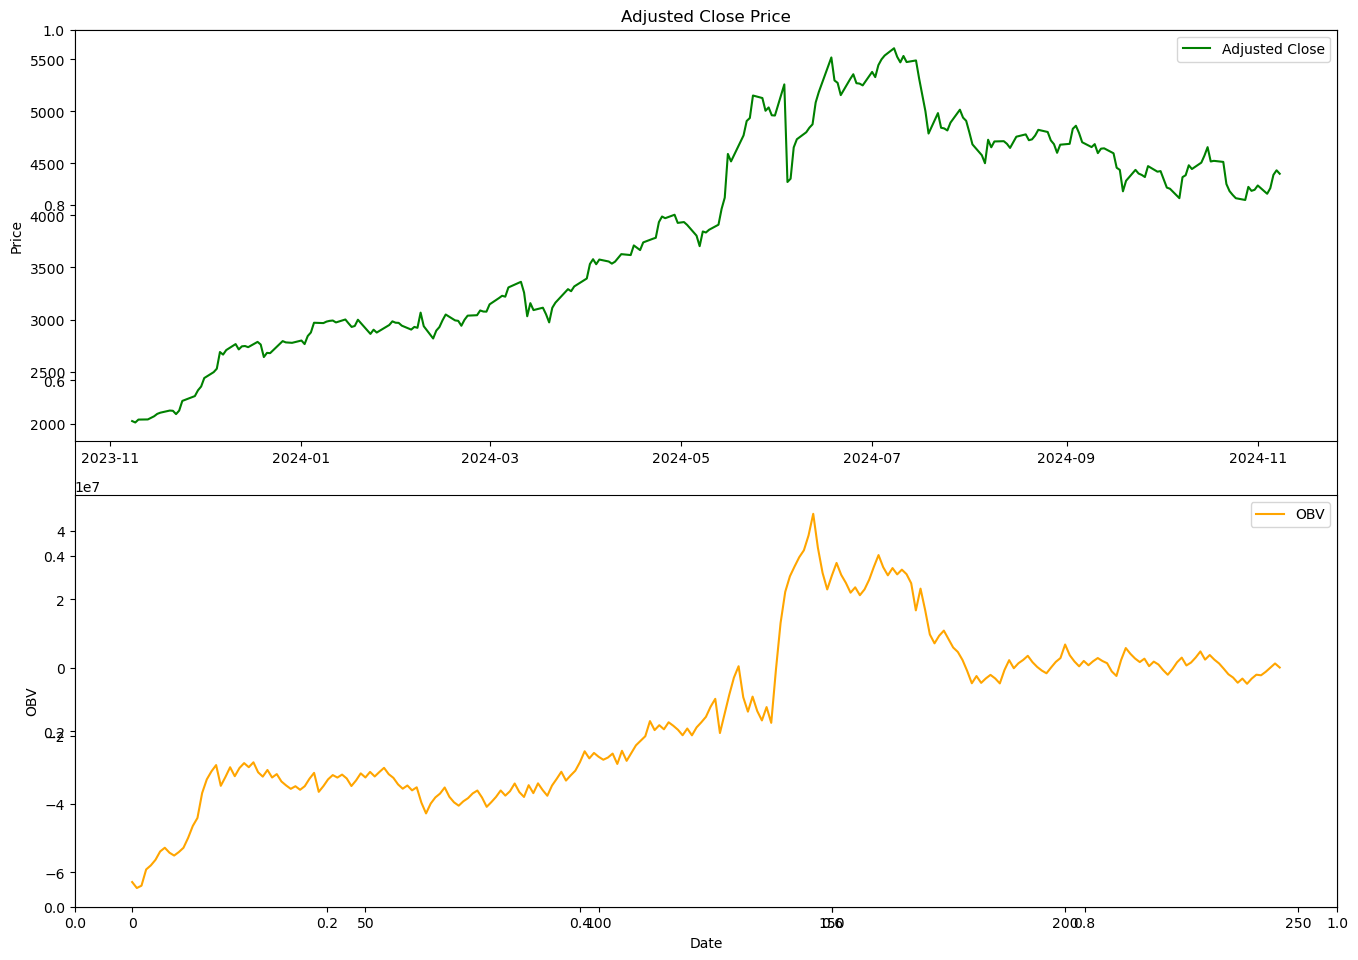

In [41]:
obv_HAL = calculate_obv(HAL)  # Assuming the calculate_obv function is already defined

# Plot Adjusted Close and OBV for HAL
fig, ax = plt.subplots(figsize=(14, 10))

# Plot Adjusted Close in the first subplot
plt.subplot(2, 1, 1)
plt.plot(HAL['Date'],HAL['Adjusted Close'], color='g', label='Adjusted Close')
plt.title('Adjusted Close Price')
plt.ylabel('Price')
plt.legend()

# Plot OBV in the second subplot
plt.subplot(2, 1, 2)
plt.plot(obv_HAL, '-', label='OBV', color='orange')
plt.xlabel('Date')
plt.ylabel('OBV')
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [42]:
HAL=pd.read_csv('stock_dataAllyrs.csv')

In [43]:
HAL.shape

(1633, 7)

HAL['Open_Close']
This calculates the percentage difference between the stock’s opening price and its closing price for the day. It’s divided by the opening price to normalize the value.
HAL['High_Low']
This calculates the percentage difference between the stock’s highest price and lowest price of the day, divided by the lowest price.
HAL['Increase_Decrease']
This checks if the next day’s trading volume is higher than today’s.
If yes, it assigns 1 (volume increased); otherwise, 0 (volume decreased).
HAL['Buy_Sell_on_Open']
This checks if the next day’s opening price is higher than today’s opening price.
If yes, it assigns 1 (good to buy at today’s open); otherwise, 0.
HAL['Buy_Sell']
This checks if the next day’s adjusted close price is higher than today’s adjusted close.
If yes, it assigns 1 (good to hold/buy); otherwise, 0.
HAL['Returns']
This calculates the percentage return of the stock from the previous day to today using the formula for percentage change.


In [44]:

import numpy as np

# Assuming HAL DataFrame has the required columns: 'Open', 'High', 'Low', 'Adj Close', 'Volume'
# Adding calculations for HAL DataFrame

HAL['Open_Close'] = (HAL['Open'] - HAL['Adjusted Close']) / HAL['Open']
HAL['High_Low'] = (HAL['High'] - HAL['Low']) / HAL['Low']
HAL['Increase_Decrease'] = np.where(HAL['Volume'].shift(-1) > HAL['Volume'], 1, 0)
HAL['Buy_Sell_on_Open'] = np.where(HAL['Open'].shift(-1) > HAL['Open'], 1, 0)
HAL['Buy_Sell'] = np.where(HAL['Adjusted Close'].shift(-1) > HAL['Adjusted Close'], 1, 0)
HAL['Returns'] = HAL['Adjusted Close'].pct_change()

# Drop missing values
HAL = HAL.dropna()

# Display the first few rows of the modified HAL DataFrame
HAL.head()


Date     Open     High      Low    Close  Adjusted Close   Volume  \
1  11/07/2024  4404.00  4454.00  4381.10  4433.80         4433.80  1185134   
2  11/06/2024  4276.00  4420.00  4270.05  4390.15         4390.15  1228872   
3  11/05/2024  4200.00  4280.00  4130.00  4261.95         4261.95  1215686   
4  11/04/2024  4287.95  4287.95  4196.00  4208.25         4208.25  1013884   
5  11/01/2024  4269.80  4295.55  4257.05  4288.00         4288.00   170153   

   Open_Close  High_Low  Increase_Decrease  Buy_Sell_on_Open  Buy_Sell  \
1   -0.006767  0.016640                  1                 0         0   
2   -0.026696  0.035117                  0                 0         0   
3   -0.014750  0.036320                  0                 1         0   
4    0.018587  0.021914                  0                 0         1   
5   -0.004262  0.009044                  1                 0         0   

    Returns  
1  0.007544  
2 -0.009845  
3 -0.029202  
4 -0.012600  
5  0.018951

In [45]:
HAL.shape

(1632, 13)

In [46]:

X = np.array(HAL['Open']).reshape(1632,-1)
Y = np.array(HAL['Adjusted Close']).reshape(1632,-1)

In [47]:
lr = LinearRegression()

In [48]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.6)

In [49]:
x_train.size

979

In [50]:
x_test.size

653

In [51]:
lr.fit(x_train,y_train)

LinearRegression()

In [52]:
print(lr.score(x_test,y_test))

0.9991630016367853


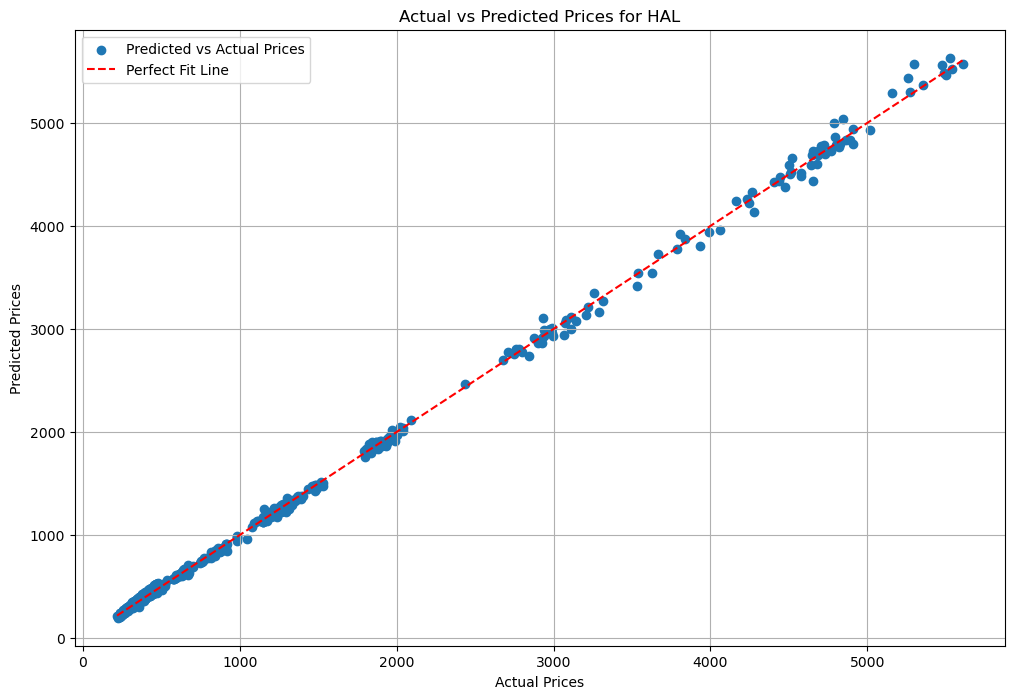

In [53]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, lr.predict(x_test), label='Predicted vs Actual Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices for HAL')
plt.grid(True)
plt.legend()
plt.show()